In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma,uniform,norm

## Help from: https://github.com/michaelmml/Oil-Well-Productivity-SD/blob/main/OilGasProduction.py

In [2]:
df2 = pd.read_excel('Final Data.xlsx')

## For year 2011

In [3]:
data = df2.loc[df2['Year']==2011,'Emissions']

# Fit the data to a gamma distribution
alpha_hat, loc, beta_hat = gamma.fit(data, floc=0)  # forcing location parameter to be 0

print(f"Estimated shape parameter (alpha): {alpha_hat}")
print(f"Estimated scale parameter (beta): {beta_hat}")


Estimated shape parameter (alpha): 0.33860763598775423
Estimated scale parameter (beta): 16725298.297268819


In [4]:
np.random.seed(73)  # For reproducibility
shape_param = 0.33860763598775423  # Known shape parameter (k)
scale_param_true = 16725298.297268819  # True scale parameter (theta) we aim to estimate


In [5]:
def gamma_log_likelihood(alpha, beta, data):
    """
    Calculate the log likelihood of the Gamma distribution for the given data
    and parameters alpha (shape) and beta (scale).
    """
    return np.sum(gamma.logpdf(data, a=alpha, scale=beta))

def rule_for_acceptance(proposal_log_likelihood, current_log_likelihood):
    if proposal_log_likelihood > current_log_likelihood:
        return True
    accept = np.random.uniform(0, 1) # generate uniform rn
    prob = np.exp(proposal_log_likelihood - current_log_likelihood)
    if accept < prob:
        return True
    else:
        return False

    

def metropolis_hastings(data, initial_alpha, initial_beta, iterations, proposal_width=0.5):
    """
    Metropolis-Hastings sampler for inferring the posterior distribution of
    the shape (alpha) and scale (beta) parameters of a Gamma distribution.
    """
    alpha_samples = [initial_alpha]
    beta_samples = [initial_beta]
    accepted = []
    rejected = []
    current_log_likelihood = gamma_log_likelihood(alpha_samples[-1], beta_samples[-1], data)
    
    for i in range(iterations):
        # Propose new parameters
        alpha_proposal = norm.rvs(alpha_samples[-1], proposal_width)
        beta_proposal = norm.rvs(beta_samples[-1], proposal_width)
        
        # Ensure positive proposals
        if alpha_proposal <= 0 or beta_proposal <= 0:
            continue
        
        proposal_log_likelihood = gamma_log_likelihood(alpha_proposal, beta_proposal, data)
        
        # Calculate acceptance probability
        
        if rule_for_acceptance(proposal_log_likelihood, current_log_likelihood):
            acceptance_probability = max(1,np.exp(proposal_log_likelihood - current_log_likelihood))
            alpha_samples.append(alpha_proposal)
            beta_samples.append(beta_proposal)
            current_log_likelihood = proposal_log_likelihood
            accepted.append([alpha_proposal,beta_proposal])
            # print(accepted)
        else:
            acceptance_probability = 0
            alpha_samples.append(alpha_samples[-1])
            beta_samples.append(beta_samples[-1])
            rejected.append([alpha_proposal,beta_proposal])
       
            
    return alpha_samples, beta_samples, accepted,rejected

# Initial parameter estimates
initial_alpha = 0.33860763598775423  # Known shape parameter (k)
initial_beta = 16725298.297268819  # True scale parameter (theta) we aim to estimate
# Run the sampler
alpha_samples, beta_samples,accepted, rejected = metropolis_hastings(data, initial_alpha, initial_beta, iterations=5000)

# Information about the sampling process
print(f"Number of accepted data points: {len(accepted)}")
print(f"Number of rejected data points: {len(rejected)}")


Number of accepted data points: 196
Number of rejected data points: 3596


In [6]:
accepted = np.array(accepted)
rejected = np.array(rejected)

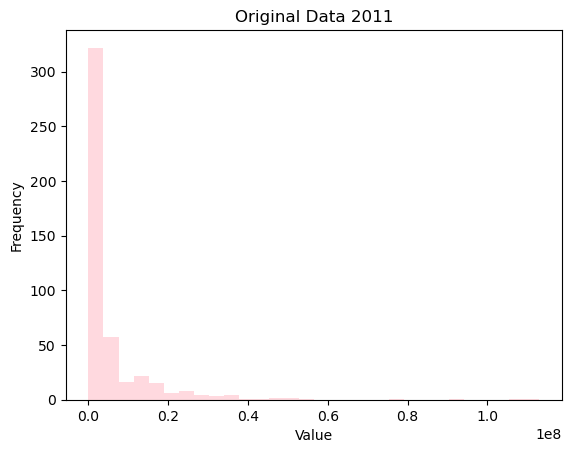

<Figure size 640x480 with 0 Axes>

In [7]:
plt.hist(data, bins=30, alpha=0.6, color='pink')
plt.title('Original Data 2011')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Original Carbon Emissions data 2011.png')






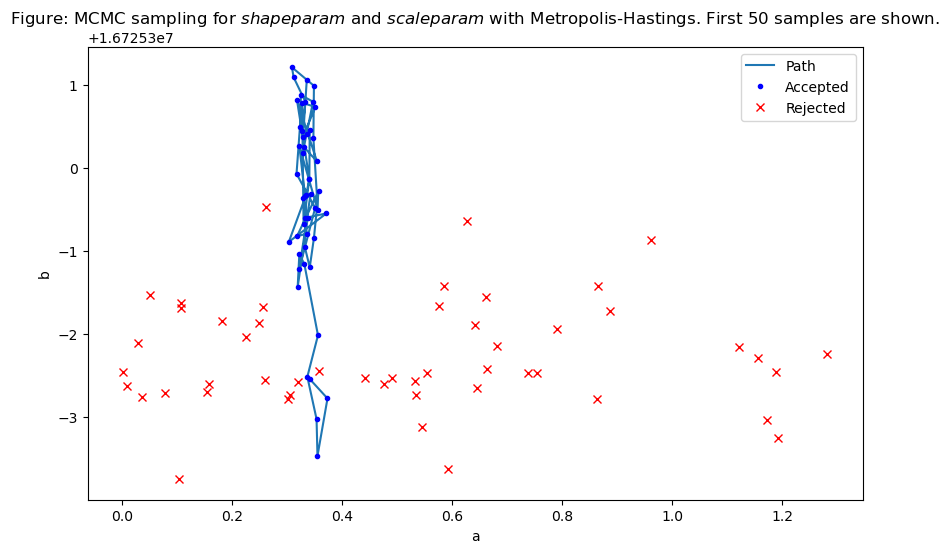

In [8]:
# Metropolis_Hastings burn-in and convergence illustration
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(3, 1, 1)
ax.plot(accepted[:50, 0], accepted[:50, 1], label="Path")
ax.plot(accepted[:50, 0], accepted[:50, 1], 'b.', label='Accepted')
ax.plot(rejected[:50, 0], rejected[:50, 1], 'rx', label='Rejected')
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure: MCMC sampling for $shape param$ and $scale param$ with Metropolis-Hastings. First 50 samples are shown.")
plt.savefig('Carbon Emissions MCMC sampling First 50 samples 2011.png')




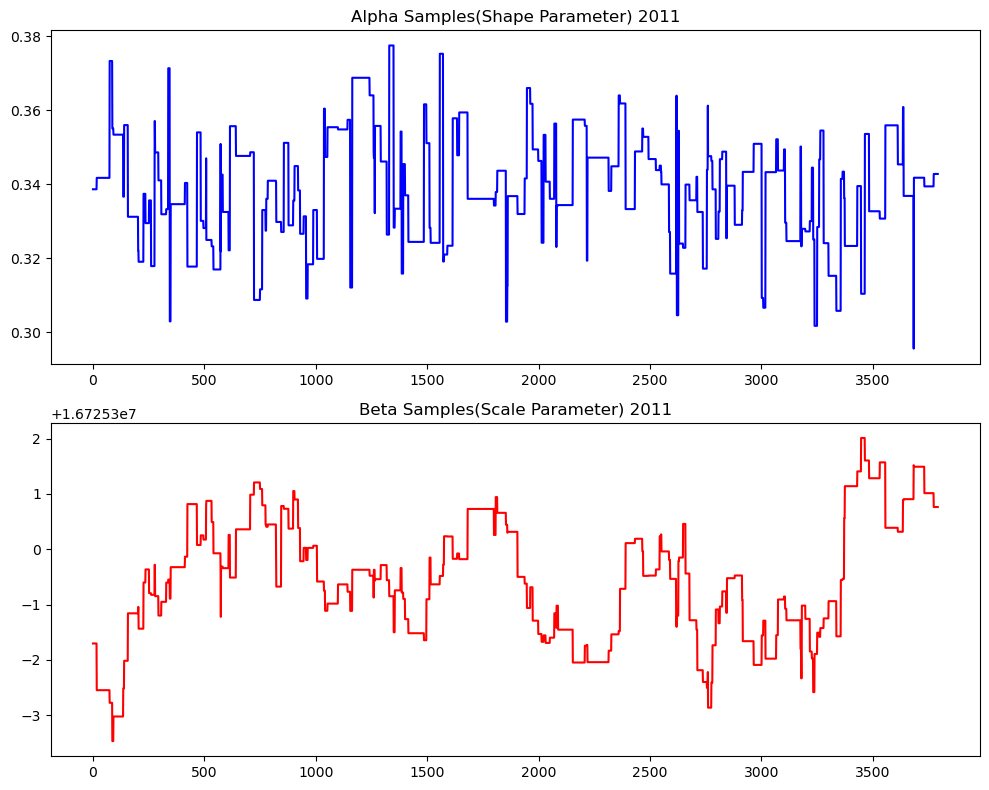

<Figure size 640x480 with 0 Axes>

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(alpha_samples, 'b')
axs[0].set_title('Alpha Samples(Shape Parameter) 2011')
axs[1].plot(beta_samples, 'r')
axs[1].set_title('Beta Samples(Scale Parameter) 2011')
plt.tight_layout()
plt.show()
plt.savefig('Alpha and Beta Values-2011.png')



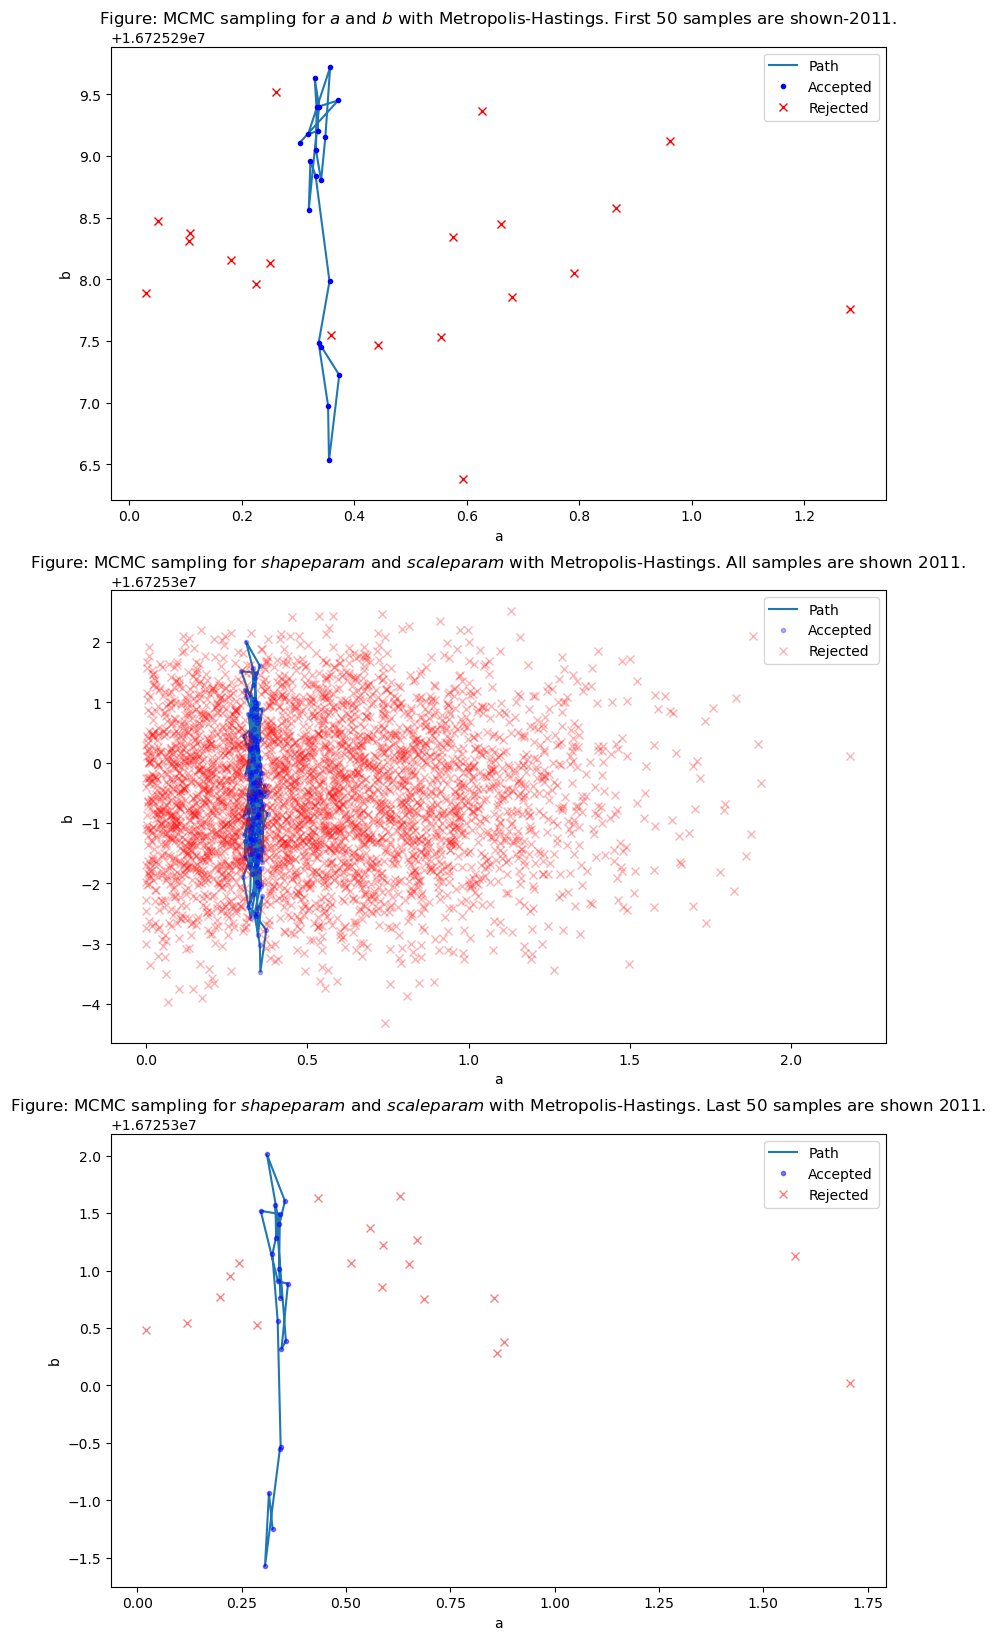

In [14]:
to_show = 20
# Metropolis_Hastings burn-in and convergence illustration
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(3, 1, 1)
ax.plot(accepted[:to_show, 0], accepted[:to_show, 1], label="Path")
ax.plot(accepted[:to_show, 0], accepted[:to_show, 1], 'b.', label='Accepted')
ax.plot(rejected[:to_show, 0], rejected[:to_show, 1], 'rx', label='Rejected')
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. First 50 samples are shown-2011.")
plt.savefig('Carbon Emissions MCMC sampling First 50 samples-2011.png')


ax = fig.add_subplot(3, 1, 2)
ax.plot(accepted[:, 0], accepted[:, 1], label="Path")
ax.plot(accepted[:, 0], accepted[:, 1], 'b.', label='Accepted', alpha=0.3)
ax.plot(rejected[:, 0], rejected[:, 1], 'rx', label='Rejected', alpha=0.3)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure: MCMC sampling for $shape param$ and $scale param$ with Metropolis-Hastings. All samples are shown 2011.")
fig.savefig('Carbon Emmissions MCMC All Samples-2011.png')


ax = fig.add_subplot(3, 1, 3)
ax.plot(accepted[-to_show:, 0], accepted[-to_show:, 1], label="Path")
ax.plot(accepted[-to_show:, 0], accepted[-to_show:, 1], 'b.', label='Accepted', alpha=0.5)
ax.plot(rejected[-to_show:, 0], rejected[-to_show:, 1], 'rx', label='Rejected', alpha=0.5)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure: MCMC sampling for $shape param$ and $scale param$ with Metropolis-Hastings. Last 50 samples are shown 2011.")
fig.savefig('Carbon Emmissions sampling Last 50 samples-2011.png')




0.3377725602825232 16725299.145069607


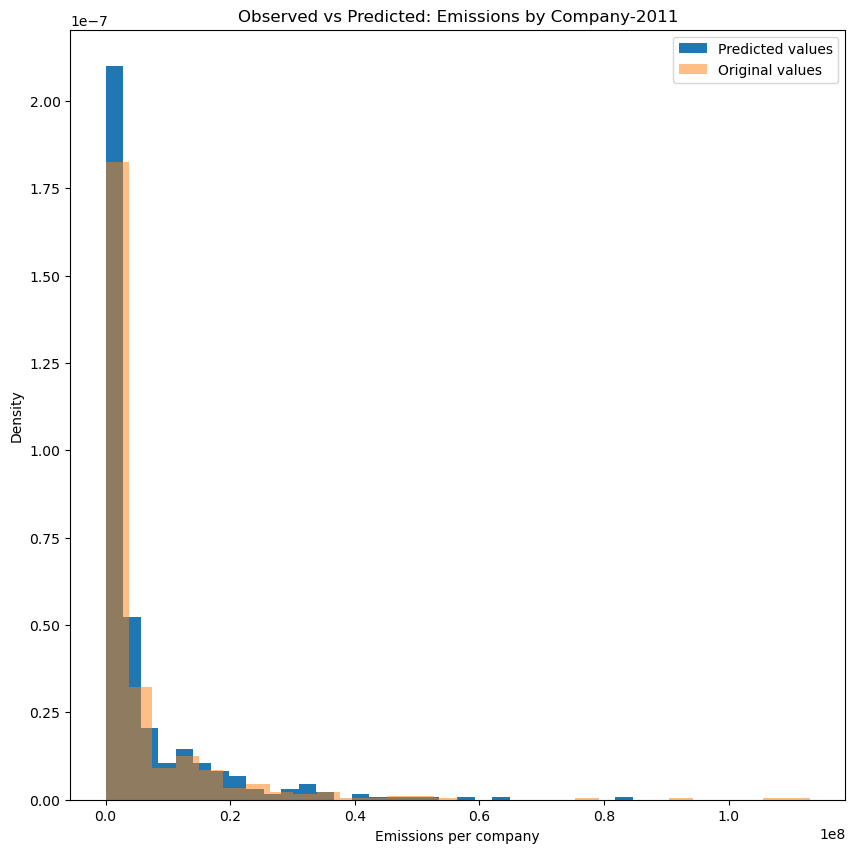

In [15]:
show = -int(0.5 * accepted.shape[0])

mu = accepted[show:, 0].mean()
sigma = accepted[show:, 1].mean()
print(mu, sigma)

model = lambda t, mu, sigma: np.random.gamma(mu, sigma, t)
t = np.arange(data.shape[0])
observations = model(t.shape[0], mu, sigma)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

# Histogram of observed emissions and predicted emissions based on Gamma Distribution generated by
# Metropolis-Hastings

ax.hist(observations, histtype='stepfilled', density=True, edgecolor='none', bins=30, label="Predicted values")
ax.hist(data, histtype='stepfilled', density=True, edgecolor='none', bins=30, alpha=0.5, label="Original values")
ax.set_xlabel("Emissions per company")
ax.set_ylabel("Density")
ax.set_title("Observed vs Predicted: Emissions by Company-2011")
ax.legend()
plt.savefig('Carbon Emissions MCMC-2011')


In [16]:
accepted_datapoints = [gamma.rvs(a=alpha_proposal, scale=beta_proposal, size=1)[0] for alpha_proposal,beta_proposal in accepted]

In [17]:
accepted_datapoints

[20010416.18547912,
 270601.90122962353,
 3306199.751941519,
 8154588.972457333,
 6618194.177582808,
 6971800.652657782,
 661149.5156879225,
 184003.36008515628,
 34020.841322298984,
 1684298.1104389818,
 891111.7325349611,
 163091.61567963116,
 1838384.5638503213,
 1149370.865610022,
 1013815.652051673,
 5329.533486759387,
 4663211.555187115,
 432360.2132364967,
 7.499730520493796,
 1344145.2954736992,
 553999.963343066,
 126247.76976193122,
 796874.0627256505,
 295858.0234938126,
 3042.729597559363,
 2298687.7069957666,
 6287977.097247551,
 72.59701693146232,
 1718418.8733129709,
 2121180.7651754143,
 102414.89859270754,
 26486719.1287436,
 9249764.19868946,
 5991774.187977715,
 483333.2246943966,
 928104.6259308023,
 2072.797474957226,
 8252658.382679707,
 1679012.9535649526,
 498520.12952698424,
 750124.1011579473,
 1174225.2861941862,
 640.2179775076206,
 9962094.26596997,
 15862285.35582724,
 51340.464647052155,
 4006108.3116697827,
 604265.2859826151,
 29809.704051141143,
 19794

## For 2013

In [18]:
data = df2.loc[df2['Year']==2013,'Emissions']

# Fit the data to a gamma distribution
alpha_hat, loc, beta_hat = gamma.fit(data, floc=0)  # forcing location parameter to be 0

print(f"Estimated shape parameter (alpha): {alpha_hat}")
print(f"Estimated scale parameter (beta): {beta_hat}")
np.random.seed(73)  # For reproducibility
initial_alpha = alpha_hat  # Known shape parameter (k)
initial_beta = beta_hat
# Run the sampler
alpha_samples, beta_samples,accepted, rejected = metropolis_hastings(data, initial_alpha, initial_beta, iterations=5000)

# Information about the sampling process
print(f"Number of accepted data points: {len(accepted)}")
print(f"Number of rejected data points: {len(rejected)}")
accepted = np.array(accepted)
rejected = np.array(rejected)


Estimated shape parameter (alpha): 0.34964029771236194
Estimated scale parameter (beta): 16362447.98502256
Number of accepted data points: 188
Number of rejected data points: 3635


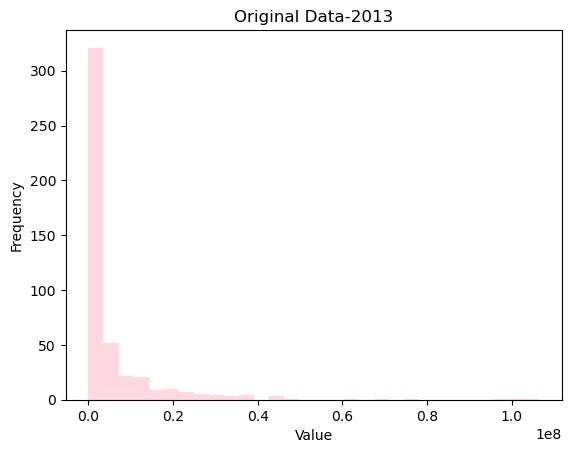

<Figure size 640x480 with 0 Axes>

In [19]:
plt.hist(data, bins=30, alpha=0.6, color='pink')
plt.title('Original Data-2013')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
plt.savefig('Original Carbon Emissions data 2013.png')


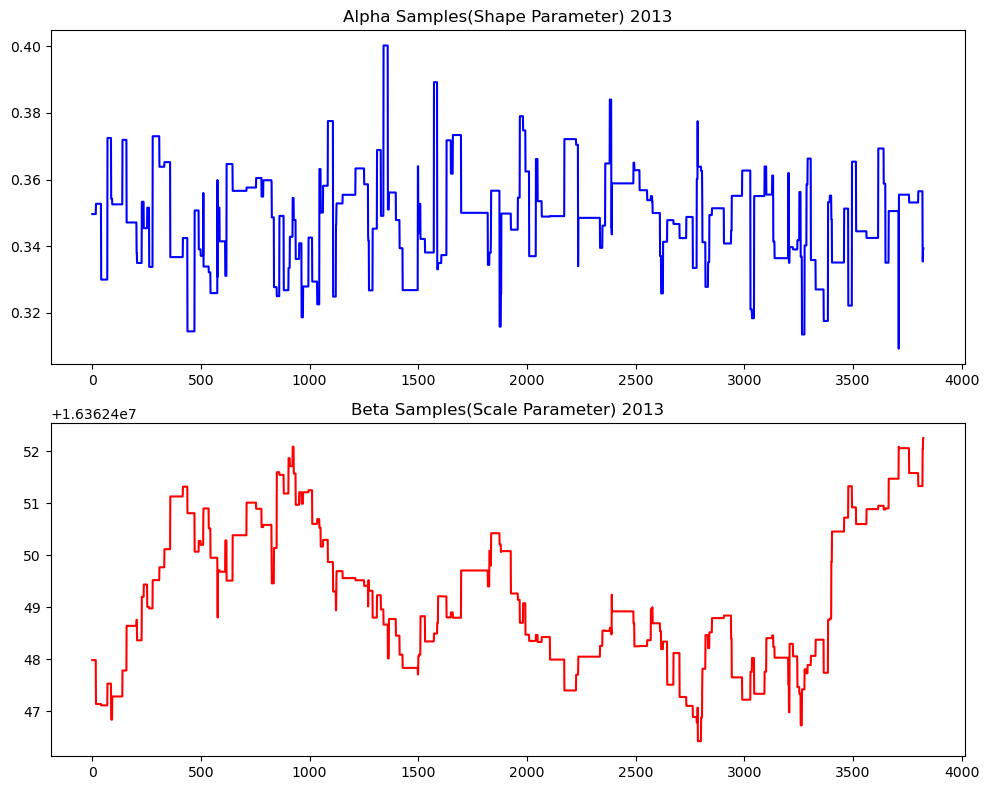

<Figure size 640x480 with 0 Axes>

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(alpha_samples, 'b')
axs[0].set_title('Alpha Samples(Shape Parameter) 2013')
axs[1].plot(beta_samples, 'r')
axs[1].set_title('Beta Samples(Scale Parameter) 2013')
plt.tight_layout()
plt.show()
plt.savefig('Alpha and Beta Values-2013.png')


0.34807870717730954 16362448.704757124


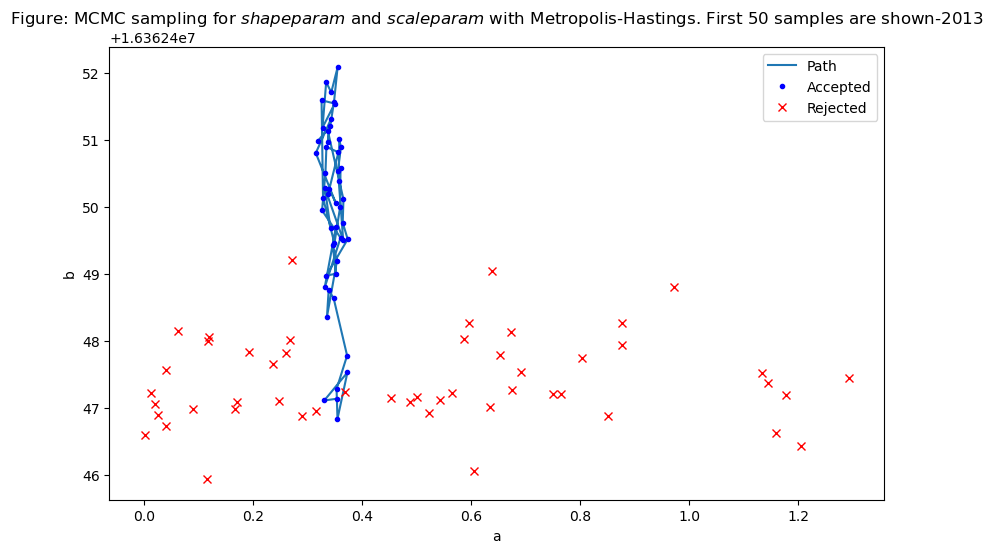

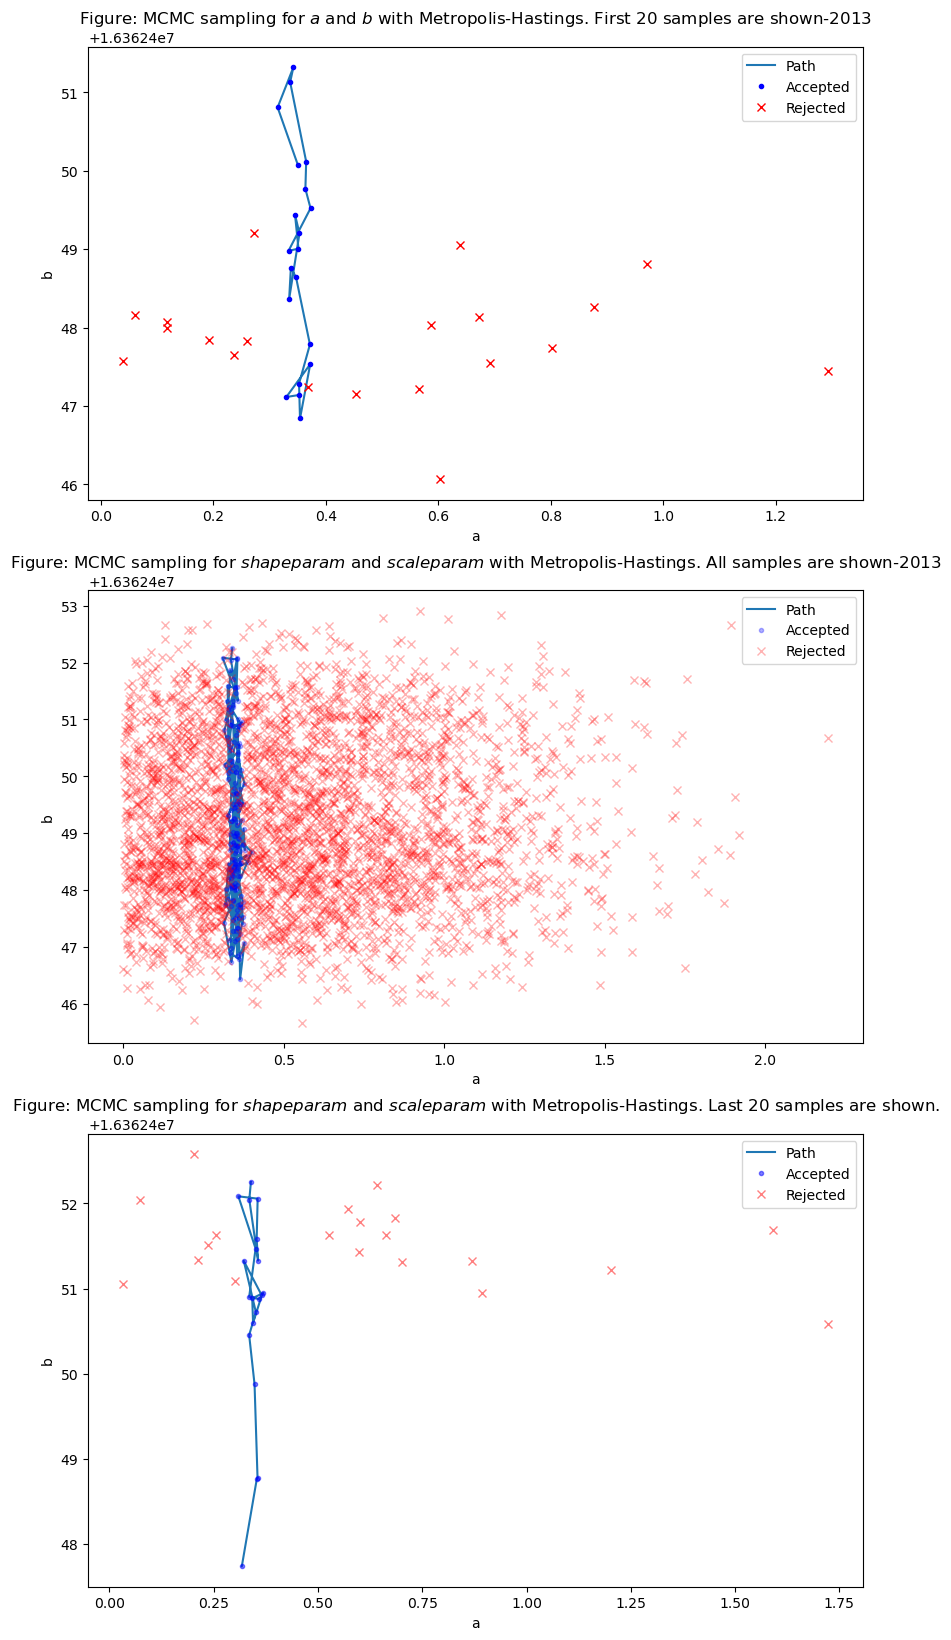

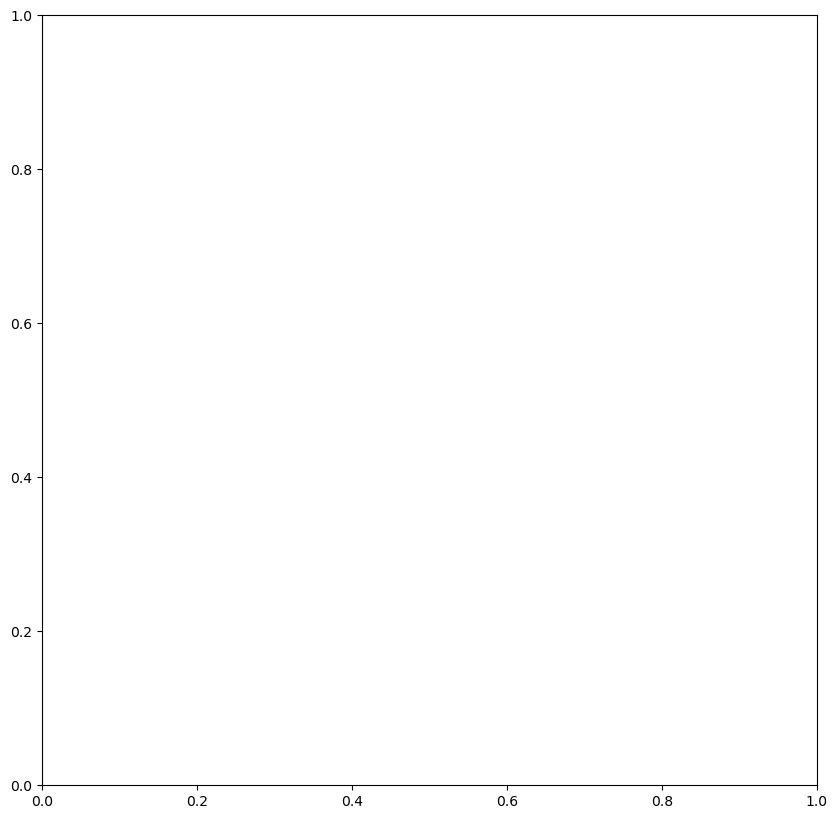

In [21]:

# Metropolis_Hastings burn-in and convergence illustration
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(3, 1, 1)
ax.plot(accepted[:50, 0], accepted[:50, 1], label="Path")
ax.plot(accepted[:50, 0], accepted[:50, 1], 'b.', label='Accepted')
ax.plot(rejected[:50, 0], rejected[:50, 1], 'rx', label='Rejected')
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure: MCMC sampling for $shape param$ and $scale param$ with Metropolis-Hastings. First 50 samples are shown-2013")
fig.savefig('Carbon Emissions MCMC sampling First 50 samples-2013.png')



to_show = 20
# Metropolis_Hastings burn-in and convergence illustration
fig = plt.figure(figsize=(10, 20))
ax = fig.add_subplot(3, 1, 1)
ax.plot(accepted[:to_show, 0], accepted[:to_show, 1], label="Path")
ax.plot(accepted[:to_show, 0], accepted[:to_show, 1], 'b.', label='Accepted')
ax.plot(rejected[:to_show, 0], rejected[:to_show, 1], 'rx', label='Rejected')
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure: MCMC sampling for $a$ and $b$ with Metropolis-Hastings. First 20 samples are shown-2013")
plt.savefig('Carbon Emmissions sampling first 20 samples.png')



ax = fig.add_subplot(3, 1, 2)
ax.plot(accepted[:, 0], accepted[:, 1], label="Path")
ax.plot(accepted[:, 0], accepted[:, 1], 'b.', label='Accepted', alpha=0.3)
ax.plot(rejected[:, 0], rejected[:, 1], 'rx', label='Rejected', alpha=0.3)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure: MCMC sampling for $shape param$ and $scale param$ with Metropolis-Hastings. All samples are shown-2013")
fig.savefig('Carbon Emmissions MCMC All Samples.png')


ax = fig.add_subplot(3, 1, 3)
ax.plot(accepted[-to_show:, 0], accepted[-to_show:, 1], label="Path")
ax.plot(accepted[-to_show:, 0], accepted[-to_show:, 1], 'b.', label='Accepted', alpha=0.5)
ax.plot(rejected[-to_show:, 0], rejected[-to_show:, 1], 'rx', label='Rejected', alpha=0.5)
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.legend()
ax.set_title("Figure: MCMC sampling for $shape param$ and $scale param$ with Metropolis-Hastings. Last 20 samples are shown.")
fig.savefig('Carbon Emmissions sampling Last 20 samples.png')




0.34807870717730954 16362448.704757124


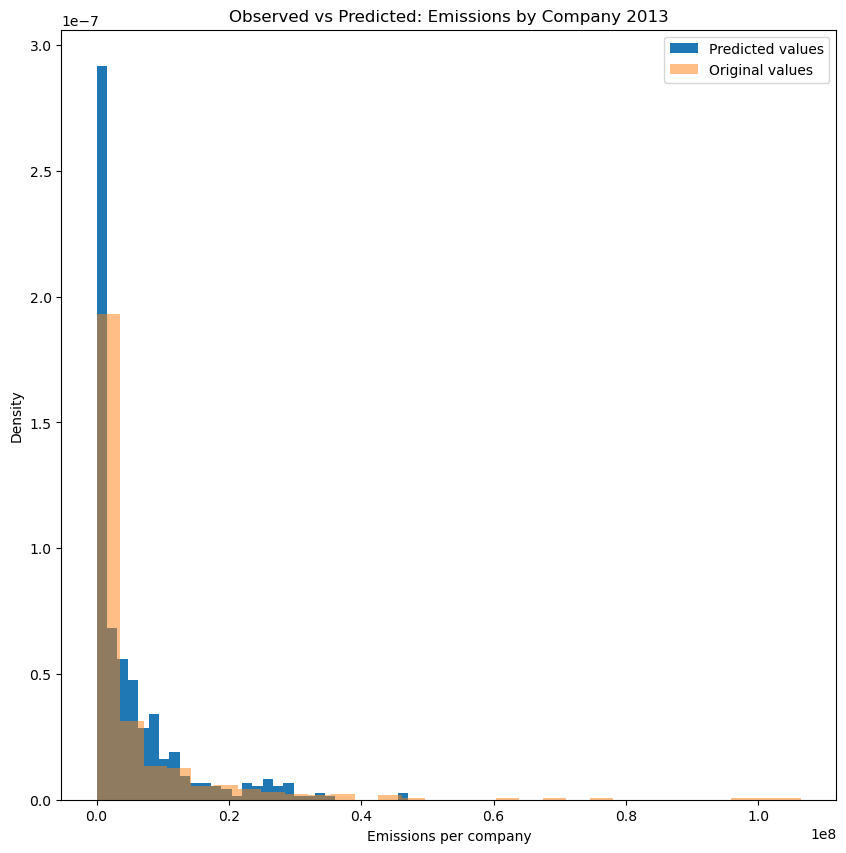

In [24]:

# Histogram of observed emissions and predicted emissions based on Gamma Distribution generated by
# Metropolis-Hastings
show = -int(0.5 * accepted.shape[0])

mu = accepted[show:, 0].mean()
sigma = accepted[show:, 1].mean()
print(mu, sigma)

model = lambda t, mu, sigma: np.random.gamma(mu, sigma, t)
t = np.arange(data.shape[0])
observations = model(t.shape[0], mu, sigma)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)

ax.hist(observations, histtype='stepfilled', density=True, edgecolor='none', bins=30, label="Predicted values")
ax.hist(data, histtype='stepfilled', density=True, edgecolor='none', bins=30, alpha=0.5, label="Original values")
ax.set_xlabel("Emissions per company")
ax.set_ylabel("Density")
ax.set_title("Observed vs Predicted: Emissions by Company 2013")
ax.legend()
plt.savefig('Carbon Emissions MCMC-2013')


plt.show()

In [25]:
accepted_datapoints = [gamma.rvs(a=alpha_proposal, scale=beta_proposal, size=1)[0] for alpha_proposal,beta_proposal in accepted]
accepted_datapoints

[10622458.01529052,
 13879.729324553531,
 8493.466042078719,
 657462.9507036748,
 157506.98814725204,
 1490322.3343618591,
 580829.3728719557,
 501699.9355021646,
 9811707.388932949,
 1977856.7829409793,
 2474020.331814611,
 808753.512225712,
 7274.175983515531,
 3349393.591130933,
 959380.9592286303,
 6467594.251791394,
 11573735.134805812,
 1142863.727311535,
 1132488.9132598068,
 883588.7776701155,
 1854309.2701031878,
 17.193032259292508,
 80479.53813773247,
 22996750.62294609,
 24424574.246484693,
 766640.1710608884,
 13042260.934442772,
 4659715.260368584,
 294405.0888338937,
 8385839.519841651,
 151398.5277849747,
 20413.134497438274,
 2253798.617319278,
 238130.05557978954,
 3426481.800083395,
 4991898.587594121,
 46645072.09495068,
 2097084.1759734235,
 15952.9393702592,
 1937305.7017477152,
 27746.937249181577,
 4851082.092437637,
 8282745.312827709,
 7512511.601765421,
 288437.8685231371,
 4494148.839601094,
 9996.159102242142,
 15317688.011426289,
 1326.9684084766518,
 2078